# O Naive Bayes

Naive Bayes trata-se de um método supervisionado que gera modelos de classificação probabilísticos muito bons.Ele usa o teorema de probabilidade de Bayes para prever a classe de um conjunto de dados desconhecidos.Ele supõe que as variáveis são independentes umas das outras.O desempenho é bom em caso de variáveis categóricas de entrada comparada com as numéricas. Para variáveis numéricas, assume-se a distribuição normal. Ele é muito usado em predições em tempo real, por ser mto rápido e ágil. Seu uso em classificação de textos e análise de sentimentos também é bastante importante.

Existem três tipos de classificadores : Bernoulli (Binomial), usado quanto temos apenas duas classificações a serem feitas,o Multinomial, usado quando temos valores discretos e Gaussian, usado quando a distribuição é normal.

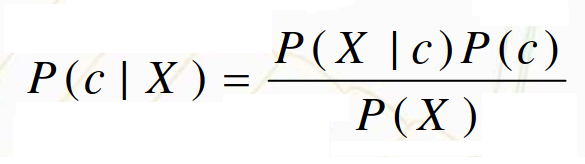

In [1]:
from IPython.display import Image
Image(filename = "/home/jfs/Imagens/naive.png", width = 400, height = 400 )

Utilizaremos aqui o Naive Bayes para processamento de textos. Para isso, usamos um dataset com tweets, gerado e 
classificado pela Cia de TI do estado de Mg. O modelo mapeia a quantidade de cada termo no texto e constrói um
vetor com suas frequências (Bag of words). Ele também rotula os sentimentos dos tweets, ou seja, avalia se o
comentário é positivo, negativo ou neutro. Esse estudo é muito importante para empresas, por exemplo, avaliarem sua imagem frente à comunidade.Vamos là.

In [2]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
import re
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [3]:
#Carregando o dataset Tweets.
data = pd.read_csv('Tweets_Mg.csv')

In [4]:
#Verificando as 5 primeiras linhas
data.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Verificando os tipos e nulidades
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
Unnamed: 0                   8199 non-null int64
Created At                   8199 non-null object
Text                         8199 non-null object
Geo Coordinates.latitude     104 non-null float64
Geo Coordinates.longitude    104 non-null float64
User Location                5489 non-null object
Username                     8199 non-null object
User Screen Name             8199 non-null object
Retweet Count                8199 non-null int64
Classificacao                8199 non-null object
Observação                   1 non-null object
Unnamed: 10                  0 non-null float64
Unnamed: 11                  0 non-null float64
Unnamed: 12                  0 non-null float64
Unnamed: 13                  0 non-null float64
Unnamed: 14                  0 non-null float64
Unnamed: 15                  0 non-null float64
Unnamed: 16                  0 non-null float64
Unnamed: 17 

In [6]:
#Verificando a quantidade de linhas do Dataframe
data.shape

(8199, 26)

In [7]:
#Retirando os Tweets que estão duplicados
data.drop_duplicates(['Text'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5765 entries, 0 to 8198
Data columns (total 26 columns):
Unnamed: 0                   5765 non-null int64
Created At                   5765 non-null object
Text                         5765 non-null object
Geo Coordinates.latitude     104 non-null float64
Geo Coordinates.longitude    104 non-null float64
User Location                3851 non-null object
Username                     5765 non-null object
User Screen Name             5765 non-null object
Retweet Count                5765 non-null int64
Classificacao                5765 non-null object
Observação                   1 non-null object
Unnamed: 10                  0 non-null float64
Unnamed: 11                  0 non-null float64
Unnamed: 12                  0 non-null float64
Unnamed: 13                  0 non-null float64
Unnamed: 14                  0 non-null float64
Unnamed: 15                  0 non-null float64
Unnamed: 16                  0 non-null float64
Unnamed: 17 

In [8]:
#Retirando as colunas Unnnamed que não serão úteis no nosso estudo
data.drop(data.iloc[:,11:26], axis = 1, inplace = True)

In [9]:
#Veririficando os tipos de sentimentos que temos
data.Classificacao.unique()

array(['Neutro', 'Negativo', 'Positivo'], dtype=object)

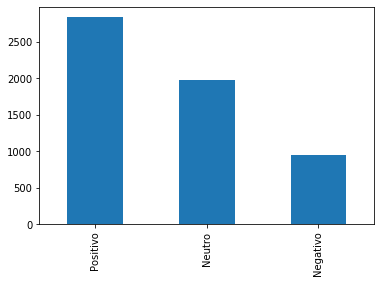

In [10]:
#Verificando o balanceamento através de um gráfico de colunas. Percebemos que há um desbalanceamento evidente.
data.Classificacao.value_counts().plot(kind='bar')

In [11]:
#Separando as variáveis em x e y
X = data['Text']
Y = data['Classificacao']

In [12]:
#Agora vamos construir o vetor com as palavras e suas frequências, para poder aplicar o Naive bayes.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer="word")
freq_tweets = vectorizer.fit_transform(X)

In [13]:
#Verificando o número de linhas e colunas criadas
freq_tweets.shape

(5765, 13029)

# Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(freq_tweets, Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
# definindo instâncias de teste dentro de uma lista
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

In [16]:
# Transforma os dados de teste em vetores de palavras.
freq_testes = vectorizer.transform(testes)
# Fazendo a classificação com o modelo treinado.
for t, c in zip (testes,clf.predict(freq_testes)):
    print (t +", "+ c)
    
# Probabilidades de cada classe
print (clf.classes_)
clf.predict_proba(freq_testes).round(2)    

Esse governo está no início, vamos ver o que vai dar, Neutro
Estou muito feliz com o governo de Minas esse ano, Neutro
O estado de Minas Gerais decretou calamidade financeira!!!, Negativo
A segurança desse país está deixando a desejar, Neutro
O governador de Minas é mais uma vez do PT, Neutro
['Negativo' 'Neutro' 'Positivo']


array([[0.18, 0.82, 0.  ],
       [0.02, 0.98, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.1 , 0.89, 0.01],
       [0.15, 0.85, 0.  ]])

# Cross Validation

In [17]:
resultados = cross_val_predict(clf, freq_tweets, Y, cv=10)

In [18]:
#Verificando os resultados em comparação com a realidade, usando a matriz de confusão
print (pd.crosstab(Y, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       846     100         5   951
Neutro         206    1656       112  1974
Positivo        53     294      2493  2840
All           1105    2050      2610  5765


In [19]:
#Verificando as métricas de avaliação
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(Y,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.96      0.88      0.91      2840
    Negativo       0.77      0.89      0.82       951
      Neutro       0.81      0.84      0.82      1974

    accuracy                           0.87      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.87      0.87      5765



Observamos uma diferença grande entre os resultados, muito provavelmente causado pelo desbalanceamento das Classes.